#  Unit 7 | Assignment - News Mood
create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

# Observations:
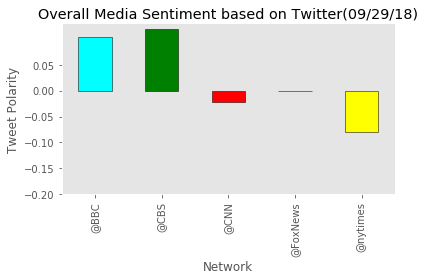
According to the scatter chart the sentiments response for all tweets for @BBC','@CBS','@CNN','@FoxNews','@nytimes':
    - there are more responses from 0-1.0 for positive sentiments.
    - NY Times(yellow) have the most 0 responses from sentiment analysis.
    
VADER Average Sentiment Analysis Table    


Network	Average Compound Score	Average Positive Score	Average Neutral Score	Average Negative Score
0   @BBC         0.103	0.098	0.059	0.843
1	@CBS	     0.120	0.082	0.032	0.886
2	@CNN	    -0.022	0.069	0.074	0.857
3	@FoxNews	-0.001	0.095	0.103	0.801
4	@nytimes	-0.079	0.064	0.097	0.839

    - Vader Analysis did not like twitter news from CNN, FoxNews and Nytimes. Their average compound scores are -0.022(CNN),
       -0.001(FoxNews) and -.0.079(NyTimes).
    - Top Average positive score are CBS(.886), CNN(.857) and BBC(.843)
    
Overall Media Sentiment based on Twitter(mm/dd/yy) bar graph
    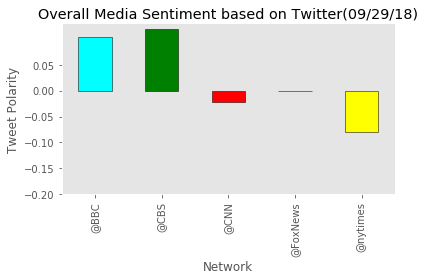
     - Nytimes has the most negative sentiment score according to bar graph.
     - CBS has the best postive sentiment score. 


In [1]:
# tweepy, pandas, matplotlib, and VADER Dependencies
# Dependencies
%matplotlib inline
import tweepy
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret


In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [28]:
# Pull 100 Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.
networks=['@NB_ED4ever','@peter_pan_daz','@CO2_Dispenser']

# Variables for holding sentiments
sentiments = []

# Loop through each network
for network in networks:
   
    # Counter
    network_counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(2):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(network,page=x)
        print(public_tweets)
        # Loop through all tweets
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
       
            # Add sentiments for each tweet into a li
            sentiments.append({"Network": network,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Text": tweet["text"],
                               "Tweets Ago": network_counter})
            # network counter,
            network_counter += 1


[{'created_at': 'Tue Oct 02 18:48:42 +0000 2018', 'id': 1047196692678725633, 'id_str': '1047196692678725633', 'text': '@sherryjystad5 how about perform analysis on @peter_pan_daz and @CO2_Dispenser', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sherryjystad5', 'name': 'sherryjystad5', 'id': 1032694285798277122, 'id_str': '1032694285798277122', 'indices': [0, 14]}, {'screen_name': 'peter_pan_daz', 'name': 'Yu-Hsuan Liu', 'id': 2277380293, 'id_str': '2277380293', 'indices': [45, 59]}, {'screen_name': 'CO2_Dispenser', 'name': 'CO2', 'id': 1037888791766228992, 'id_str': '1037888791766228992', 'indices': [64, 78]}], 'urls': []}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 1032694285798277122, 'in_reply_to_user_id_str': '1032694285798277122', 'in_reply_to_screen_name': 'sherryjystad5', 'user': {'id': 103244970913730

[{'created_at': 'Tue Oct 02 18:48:42 +0000 2018', 'id': 1047196692678725633, 'id_str': '1047196692678725633', 'text': '@sherryjystad5 how about perform analysis on @peter_pan_daz and @CO2_Dispenser', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sherryjystad5', 'name': 'sherryjystad5', 'id': 1032694285798277122, 'id_str': '1032694285798277122', 'indices': [0, 14]}, {'screen_name': 'peter_pan_daz', 'name': 'Yu-Hsuan Liu', 'id': 2277380293, 'id_str': '2277380293', 'indices': [45, 59]}, {'screen_name': 'CO2_Dispenser', 'name': 'CO2', 'id': 1037888791766228992, 'id_str': '1037888791766228992', 'indices': [64, 78]}], 'urls': []}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 1032694285798277122, 'in_reply_to_user_id_str': '1032694285798277122', 'in_reply_to_screen_name': 'sherryjystad5', 'user': {'id': 103244970913730

[{'created_at': 'Tue Oct 02 19:04:13 +0000 2018', 'id': 1047200600855703552, 'id_str': '1047200600855703552', 'text': '@NB_ED4ever, see your results! https://t.co/FM5PqBBWpb', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NB_ED4ever', 'name': 'Edward Chen', 'id': 1032449709137309696, 'id_str': '1032449709137309696', 'indices': [0, 11]}], 'urls': [], 'media': [{'id': 1047200599693963264, 'id_str': '1047200599693963264', 'indices': [31, 54], 'media_url': 'http://pbs.twimg.com/media/DohnZalVsAALKQF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DohnZalVsAALKQF.jpg', 'url': 'https://t.co/FM5PqBBWpb', 'display_url': 'pic.twitter.com/FM5PqBBWpb', 'expanded_url': 'https://twitter.com/peter_pan_daz/status/1047200600855703552/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 432, 'h': 288, 'resize': 'fit'}, 'large': {'w': 432, 'h': 288, 'resize': 'fit'}, 'medium': {'w': 432, 'h': 288, 

[{'created_at': 'Tue Oct 02 19:04:13 +0000 2018', 'id': 1047200600855703552, 'id_str': '1047200600855703552', 'text': '@NB_ED4ever, see your results! https://t.co/FM5PqBBWpb', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NB_ED4ever', 'name': 'Edward Chen', 'id': 1032449709137309696, 'id_str': '1032449709137309696', 'indices': [0, 11]}], 'urls': [], 'media': [{'id': 1047200599693963264, 'id_str': '1047200599693963264', 'indices': [31, 54], 'media_url': 'http://pbs.twimg.com/media/DohnZalVsAALKQF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DohnZalVsAALKQF.jpg', 'url': 'https://t.co/FM5PqBBWpb', 'display_url': 'pic.twitter.com/FM5PqBBWpb', 'expanded_url': 'https://twitter.com/peter_pan_daz/status/1047200600855703552/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 432, 'h': 288, 'resize': 'fit'}, 'large': {'w': 432, 'h': 288, 'resize': 'fit'}, 'medium': {'w': 432, 'h': 288, 

[{'created_at': 'Tue Oct 02 18:17:32 +0000 2018', 'id': 1047188852123660288, 'id_str': '1047188852123660288', 'text': '@peter_pan_daz @NB_ED4ever Is this the stairway to heaven?', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'peter_pan_daz', 'name': 'Yu-Hsuan Liu', 'id': 2277380293, 'id_str': '2277380293', 'indices': [0, 14]}, {'screen_name': 'NB_ED4ever', 'name': 'Edward Chen', 'id': 1032449709137309696, 'id_str': '1032449709137309696', 'indices': [15, 26]}], 'urls': []}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1047176667184037888, 'in_reply_to_status_id_str': '1047176667184037888', 'in_reply_to_user_id': 2277380293, 'in_reply_to_user_id_str': '2277380293', 'in_reply_to_screen_name': 'peter_pan_daz', 'user': {'id': 1037888791766228992, 'id_str': '1037888791766228992', 'name': 'CO2', 'screen_name': 'CO2_Dispenser', 'location': '', 'description': '', 'url': None, 'entiti

[{'created_at': 'Tue Oct 02 18:17:32 +0000 2018', 'id': 1047188852123660288, 'id_str': '1047188852123660288', 'text': '@peter_pan_daz @NB_ED4ever Is this the stairway to heaven?', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'peter_pan_daz', 'name': 'Yu-Hsuan Liu', 'id': 2277380293, 'id_str': '2277380293', 'indices': [0, 14]}, {'screen_name': 'NB_ED4ever', 'name': 'Edward Chen', 'id': 1032449709137309696, 'id_str': '1032449709137309696', 'indices': [15, 26]}], 'urls': []}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1047176667184037888, 'in_reply_to_status_id_str': '1047176667184037888', 'in_reply_to_user_id': 2277380293, 'in_reply_to_user_id_str': '2277380293', 'in_reply_to_screen_name': 'peter_pan_daz', 'user': {'id': 1037888791766228992, 'id_str': '1037888791766228992', 'name': 'CO2', 'screen_name': 'CO2_Dispenser', 'location': '', 'description': '', 'url': None, 'entiti

In [22]:
# Create Network DataFrame from Results List
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head()

,Compound,Date,Negative,Network,Neutral,Positive,Text,Tweets Ago
0,0.0,Tue Oct 02 18:48:42 +0000 2018,1.0,@NB_ED4ever,0.0,0.0,@sherryjystad5 how about perform analysis on @...,1
1,0.0,Tue Oct 02 18:42:42 +0000 2018,1.0,@NB_ED4ever,0.0,0.0,@pan_bot Analyze:@CO2_Dispenser,2
2,0.0,Tue Oct 02 18:42:33 +0000 2018,1.0,@NB_ED4ever,0.0,0.0,@pan_bot Analyze:@sherryjystad5,3
3,0.0,Tue Oct 02 13:32:37 +0000 2018,1.0,@NB_ED4ever,0.0,0.0,"Here you go @peter_pan_daz, this will cost you...",4
4,0.0,Tue Oct 02 03:28:46 +0000 2018,1.0,@NB_ED4ever,0.0,0.0,"Here you go @NakamotoThomas, this will cost yo...",5


In [21]:
# Export the data in the DataFrame into a CSV file.
sentiments_df.to_csv("Output/Friend_Sentiment_Results.csv")

In [17]:
# Calculate Vader Sentiments average for compound, negative positive and neutral

average_compound_score = round(sentiments_df.groupby('Network')['Compound'].mean(),3)
average_positive_score = round(sentiments_df.groupby('Network')['Positive'].mean(),3)
average_neutral_score = round(sentiments_df.groupby('Network')['Neutral'].mean(),3)
average_negative_score = round(sentiments_df.groupby('Network')['Negative'].mean(),3)


# Perform a Vader sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
vader_network_results = {
                         "Average Compound Score": average_compound_score,
                         "Average Positive Score": average_positive_score ,
                         "Average Neutral Score": average_neutral_score,
                         "Average Negative Score": average_negative_score
                        }

In [18]:
# Create Vader DataFrame from Results List
vader_network_results_df = pd.DataFrame(vader_network_results).reset_index()
vader_network_results_df

,Network,Average Compound Score,Average Positive Score,Average Neutral Score,Average Negative Score
0,@CO2_Dispenser,0.095,0.093,0.0,0.907
1,@NB_ED4ever,0.048,0.027,0.0,0.973
2,@peter_pan_daz,0.000,0.000,0.0,1.000


In [25]:
# Export the data in the DataFrame into a CSV file
vader_network_results_df.to_csv("Output/Vader_Network_Friend_Results.csv")

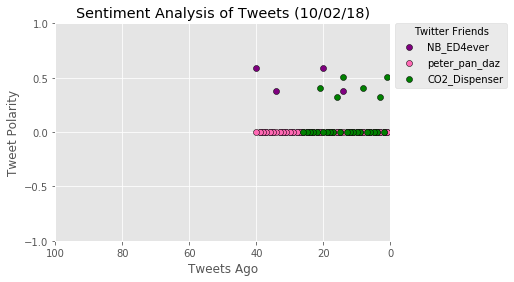

<Figure size 432x288 with 0 Axes>

In [26]:
# Scatter chart Sentiment Analysis of Media Tweets(mm/dd/yy)
# Each plot point will reflect the COMPOUND sentiment each tweet per network.
# Sort each plot point by its relative timestamp.
plt.figure(figsize=(6,4))
style.use('ggplot')


networks=['@NB_ED4ever','@peter_pan_daz','@CO2_Dispenser']

# BBC scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@NB_ED4ever']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@NB_ED4ever']
plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", label="NB_ED4ever", edgecolors="black",
            linewidth=0.5, alpha=0.9999)
# CBS scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@peter_pan_daz']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@peter_pan_daz']
plt.scatter(x_axis, y_axis, marker="o", facecolors="hotpink", label="peter_pan_daz", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# CNN scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@CO2_Dispenser']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@CO2_Dispenser']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", label="CO2_Dispenser", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Tweets ({now})") 
plt.legend(title="Twitter Friends",bbox_to_anchor=(.9,.9),bbox_transform=plt.gcf().transFigure)
plt.xlim(100,0)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
plt.grid(which='major', color='white')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Output/sentiment_friend_scatter.png")


plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

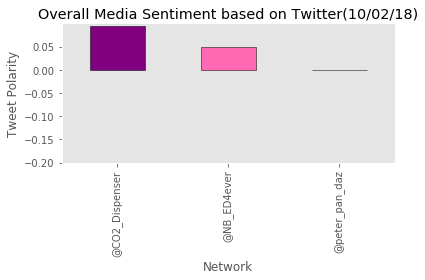

In [27]:
# Overall Media Sentiment based on Twitter(mm/dd/yy)
# x-axis - news network
# y-axis - Tweety polarity (-.20-.05)
plt.figure(figsize=(6,4))

vader_network_results_df.plot('Network', 'Average Compound Score', linewidth= .5, kind='bar',
                              color=['purple','hotpink','green','royalblue','yellow'],legend=False,
                              edgecolor="black", alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter({now})") 
#plt.ylim(-.20,.05)
plt.yticks([-0.20,-0.15,-.10,-0.05,0.00,0.05])
plt.grid(which='major')
plt.ylabel("Tweet Polarity")

# Save chart to png
#plt.savefig("Output/friend_sentiment_bar.png")
plt.savefig("Output/friend_sentiment_bar.jpg")


plt.tight_layout()
plt.show()